<pre style='font-size : 25px; text-align : center '><b>ASSIGNMENT 3</b></pre>
<pre style='font-size : 20px;'><b>INSPECTING AND SOLVING THE PROBLEM OF OVERFITTING</b></pre>
<pre style='font-size : 15px'>This time we will try to solve the problem of overfitting which occurred during the training of our classifiers on boston housing data. In order to solve it we will use an l1 and l2 regularization. We then will compare the obtained results to the previous ones.</pre>
 
<i>Note : that's a test version of a notebook</i>

<pre style='font-size : 20px'><b>PART 1</b></pre>
<pre style='font-size : 18px'><b>Linear regression with regularization</b></pre>
<pre style='font-size : 15px;'>First let's import necessary packages. </pre>

In [3]:
#Ridge - regression with l2 regularization, Lasso - regression with l1 regularization  
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<pre style='font-size : 15px'>Now it's time to load our dataset</pre>

In [4]:
def load_boston_df():
    from sklearn import datasets
    boston_data = datasets.load_boston()
    columns_to_use = ['data','target','feature_names']
    boston_data = dict([(i,boston_data[i]) for i in columns_to_use])
    df = pd.DataFrame(columns=boston_data['feature_names'], data=boston_data['data'])
    df['target'] = boston_data['target']
    return df

In [5]:
df = load_boston_df()

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
train_columns = list(df.columns)
target_column = train_columns.pop(-1)

In [8]:
train_columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [9]:
#we will set a random seed for the same results
seed = 5

In [10]:
train_set, test_set = train_test_split(df,test_size=0.20, random_state=seed)

In [11]:
X_train, y_train, X_test, y_test = train_set[train_columns], train_set[target_column],\
test_set[train_columns], test_set[target_column]

<pre style='font-size :15px'>Firstly let's try out l1 regularization using Lasso regression. One thing we need to specify when using regularization is a value of alpha parameter, the intuition behind which the following : one alpha is large - the bigger regularization effect is and vice versa.</pre>

In [12]:
#alpha - regularization strength, feel free to play around with this parameter and see the results
alpha = 0.00001

In [13]:
clf = Lasso(alpha=alpha,random_state=seed)

In [14]:
clf.fit(X_train,y_train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=5,
      selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
y_predicted_train = clf.predict(X_train)
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 22.47709044858892


In [16]:
y_predicted_test = clf.predict(X_test)
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 20.8695350662169


<pre style='font-size :15px'>Trying Lasso regression we see no changes in mse score for both test and train set, let's give l2 regularization a try (Ridge)<pre>

In [17]:
#alpha - regularization strength, feel free to play around with this parameter and see the results
alpha = 0.0001

In [18]:
clf = Ridge(alpha=alpha,random_state=seed)

In [19]:
clf.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=5, solver='auto', tol=0.001)

In [20]:
y_predicted_train = clf.predict(X_train)
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 22.47709041395737


In [21]:
y_predicted_test = clf.predict(X_test)
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 20.869382798647656


<pre style='font-size : 15px'>We also see no changes using regulariztion on linear regression, let's try it with polynomial regression</pre>

<pre style='font-size : 20px'><b>PART 2</b></pre>
<pre style='font-size : 18px'><b>Polynomial regression with regularization</b></pre>


In [22]:
from sklearn.preprocessing import PolynomialFeatures

<pre style='font-size : 15px'>As always we will firstly create our polynomial features</pre>

In [23]:
#C- degree of polynom. Feel free to play around with number and see the perfomance of the model depending on it
C = 3

In [24]:
poly = PolynomialFeatures(C)

In [25]:
poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.transform(X_test)

<pre style='font-size :15px'>We will start with l1 (Lasso) regularization</pre>

In [26]:
#alpha - regularization strength, feel free to play around with this parameter and see the results
#max_iter - number of iterations of the algorithm,feel free to play around with this parameter and see the results
alpha = 1000
max_iter = 100000

In [27]:
clf = Lasso(alpha=alpha,max_iter=max_iter,random_state=seed)

In [28]:
clf.fit(poly_features_train,y_train)

/home/kovenko/envs/vntu-assignments/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1571.7962429984073, tolerance: 3.4704285816831684
  positive)


Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=5,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
y_predicted_train = clf.predict(poly_features_train)
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 9.15410743936576


In [30]:
y_predicted_test = clf.predict(poly_features_test)
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 9.36305703840221


<pre style ='font-size:15px'>Finally the regularization for polynomial regresion worked and there is some intuition why it didn't work for linear regression. What really regularization does is making our decision boudaries simpler, to ecnourage the generalization to unseen data. And the decision boundary of linear regression is just a line, thus there is no way regularization can make it even simpler. To understand it beter, let's plot our predictions versus real target values on test set using the l1 regularization. (for convinience we will use RM feature as y) </pre>

In [35]:
import numpy as np

In [36]:
sns.set()
def plot_boundaries(alpha=0.1,C=2, max_iter=100000):
    clf = Lasso(alpha=alpha,max_iter=max_iter)
    poly = PolynomialFeatures(C)
    poly_features_train = poly.fit_transform(X_train)
    poly_features_test = poly.transform(X_test)
    clf.fit(poly_features_train,y_train)
    y_predicted_test = clf.predict(poly_features_test)
    mae = mean_squared_error(y_predicted_test,y_test)
    plt.figure(figsize=(15,12))
    plt.title('Predictions on test data with alpha of {0} ; mse score of {1} ; polynomial degree of {2}'.format(alpha,mae, C))
    plt.scatter(y_test,test_set['RM'])
    plt.scatter(y_predicted_test, test_set['RM'],color='g', marker='^')
    plt.ylabel('Number of rooms')
    plt.xlabel('Price')
    plt.legend(['Real value','Predicted value'])

/home/kovenko/envs/vntu-assignments/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356.47815377897587, tolerance: 3.2203720844327184
  positive)


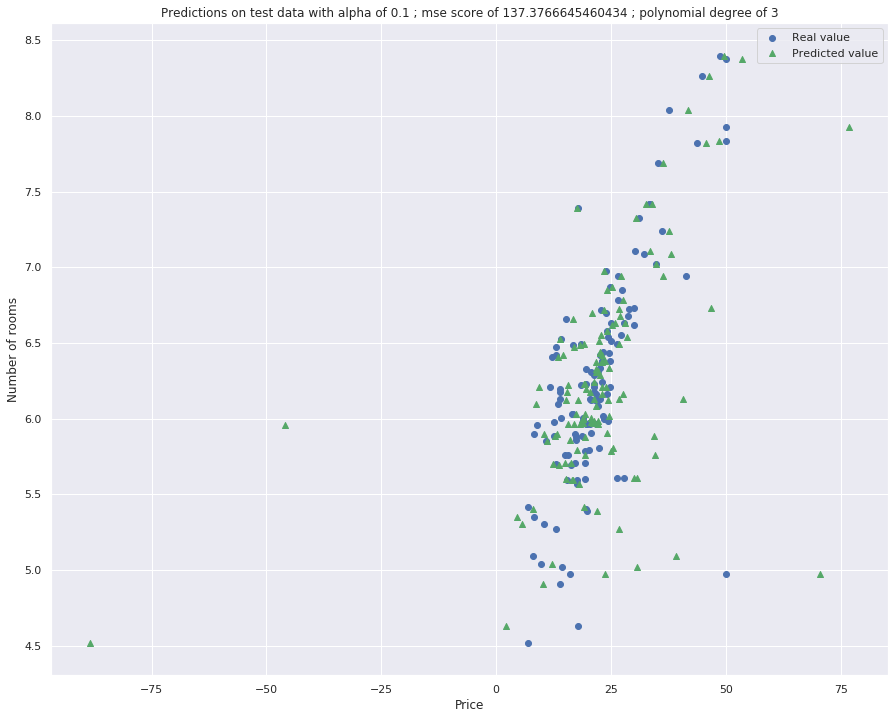

In [31]:
plot_boundaries(C=3)

/home/kovenko/envs/vntu-assignments/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597.3963288839843, tolerance: 3.2203720844327184
  positive)


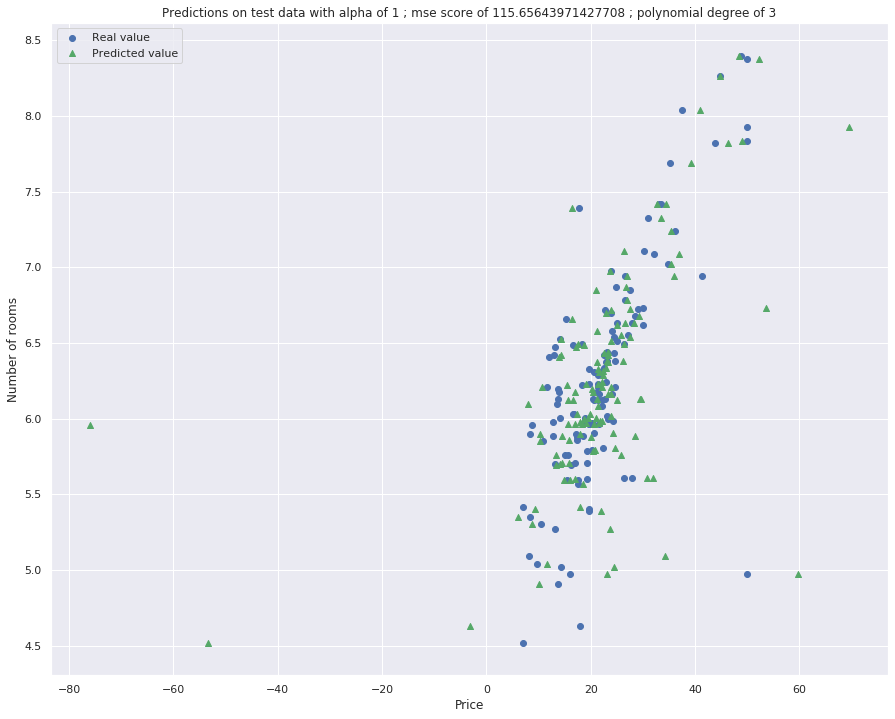

In [32]:
plot_boundaries(alpha=1, C=3)

/home/kovenko/envs/vntu-assignments/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.7413680964562, tolerance: 3.2203720844327184
  positive)


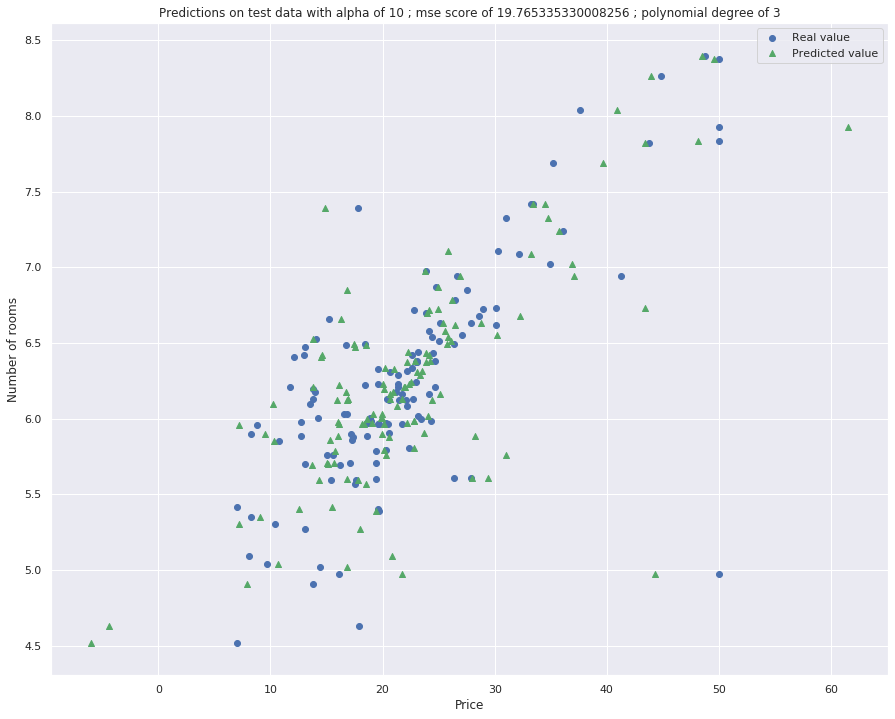

In [33]:
plot_boundaries(alpha=10, C=3)

/home/kovenko/envs/vntu-assignments/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1412.2989687776665, tolerance: 3.2203720844327184
  positive)


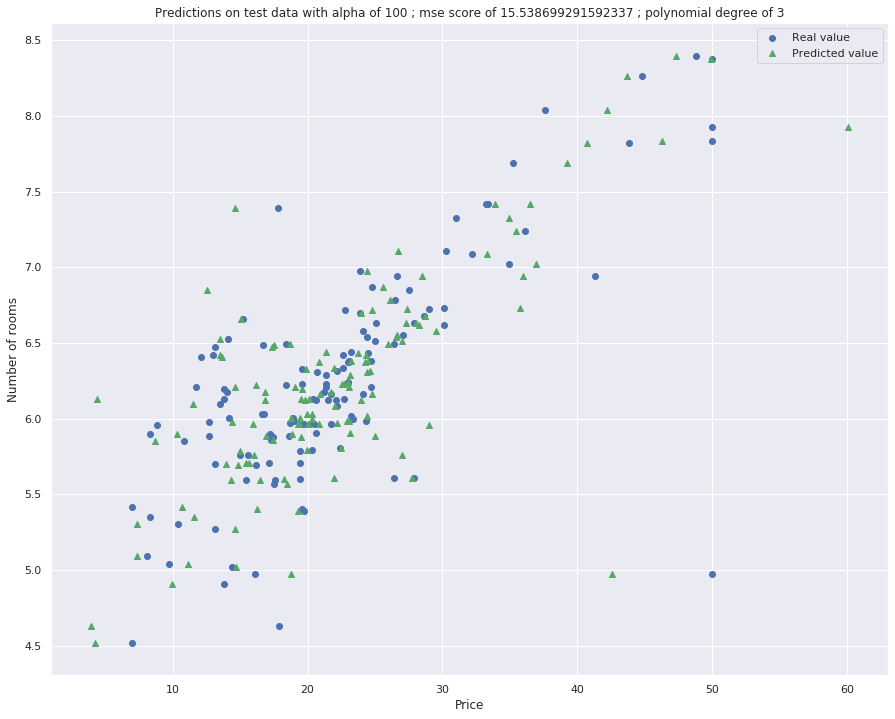

In [34]:
plot_boundaries(alpha=100, C=3)

/home/kovenko/envs/vntu-assignments/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1453.6505021939497, tolerance: 3.2203720844327184
  positive)


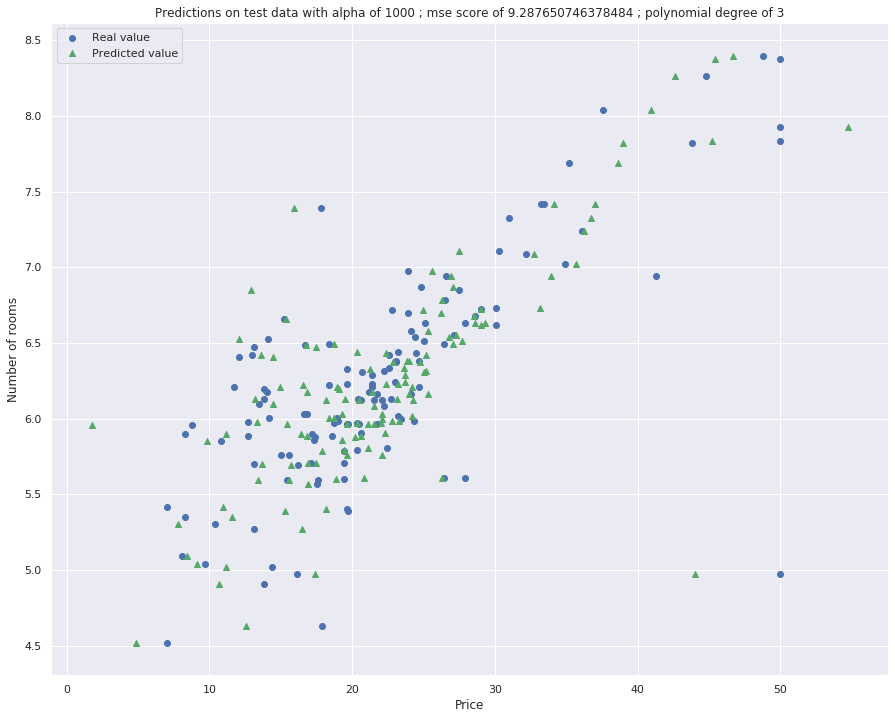

In [35]:
plot_boundaries(alpha=1000, C=3)

<pre style='font-size :15px'>Now let's try to use l2 regularization (Ridge) and see the results!</pre>

In [37]:
#C- degree of polynom. Feel free to play around with number and see the perfomance of the model depending on it
C = 2
poly = PolynomialFeatures(C)

In [38]:
poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.transform(X_test)

In [49]:
#alpha - regularization strength, feel free to play around with this parameter and see the results
#max_iter - number of iterations of the algorithm,feel free to play around with this parameter and see the results
alpha = 1e-5
max_iter = 1000000

In [50]:
clf = Ridge(alpha=alpha,max_iter=max_iter,random_state=seed)

In [51]:
clf.fit(poly_features_train,y_train)

/home/kovenko/envs/vntu-assignments/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67573e-19): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000000,
      normalize=False, random_state=5, solver='auto', tol=0.001)

In [52]:
y_predicted_train = clf.predict(poly_features_train)
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 5.879400790592775


In [53]:
y_predicted_test = clf.predict(poly_features_test)
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 10.220957553167507


<pre style='font-size :15px'>Using Ridge regression with a polynomial degree of 2 we got 11 mse score on test data, thus l2 regularization also worked well. Let's see the comparison  of Lasso and Ridge regression versus real target value. </pre>

In [54]:
def plot_bestresults_comparison():
    clf = Ridge(alpha=1e-5,max_iter=1000000,random_state=seed)
    C = 2
    poly = PolynomialFeatures(C)
    poly_features_train = poly.fit_transform(X_train)
    poly_features_test = poly.transform(X_test)
    clf.fit(poly_features_train,y_train)
    y_predicted_ridge = clf.predict(poly_features_test)
    clf = Lasso(alpha=1000,max_iter=1000000)
    C = 3
    poly = PolynomialFeatures(C)
    poly_features_train = poly.fit_transform(X_train)
    poly_features_test = poly.transform(X_test)
    clf.fit(poly_features_train,y_train)
    y_predicted_lasso = clf.predict(poly_features_test)
    plt.figure(figsize=(15,12))
    plt.title('Comparison of Lasso and Ridge regression versus real target value')
    plt.scatter(y_test,test_set['RM'])
    plt.scatter(y_predicted_lasso, test_set['RM'],color='g', marker='^')
    plt.scatter(y_predicted_ridge,test_set['RM'],color='r',marker='x')
    plt.ylabel('Number of rooms')
    plt.xlabel('Price')
    plt.legend(['Real valalue','Predicted value with Lasso (l1)','Predicted value with Ridge (l2)'])

/home/kovenko/envs/vntu-assignments/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67573e-19): result may not be accurate.
  overwrite_a=True).T


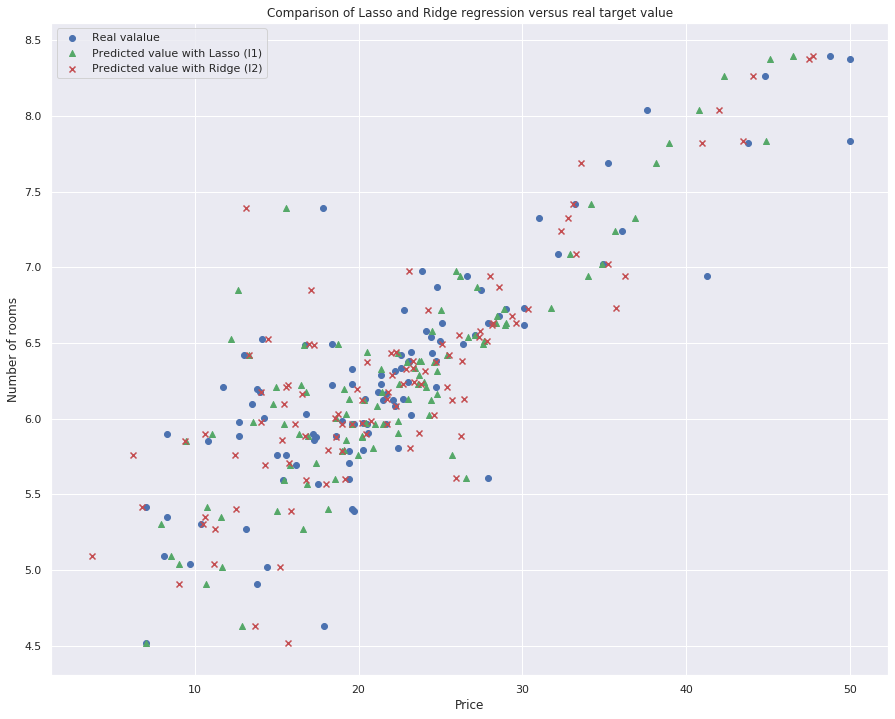

In [55]:
plot_bestresults_comparison()

<pre style='font-size : 15px'>Finally, we can see the real difference between predicted values and real ones, by printing them side by side. In our case we will use the  prices predicted by polynomial regression with l1 regularization (Lasso), as it showed the best results on test data.</pre>

In [56]:
def show_dif():
    clf = Lasso(alpha=1000,max_iter=1000000)
    C = 3
    poly = PolynomialFeatures(C)
    poly_features_train = poly.fit_transform(X_train)
    poly_features_test = poly.transform(X_test)
    clf.fit(poly_features_train,y_train)
    y_predicted_lasso = clf.predict(poly_features_test)
    for i in zip(y_predicted_lasso,y_test.values):
        print('Predicted price : {0}; Real price : {1};'.format(i[0],i[1]))

In [57]:
show_dif()

Predicted price : 40.794057785939884; Real price : 37.6;
Predicted price : 29.02067369309544; Real price : 27.9;
Predicted price : 25.417025444518345; Real price : 22.6;
Predicted price : 10.712108566037188; Real price : 13.8;
Predicted price : 38.18327877836011; Real price : 35.2;
Predicted price : 7.916967047530875; Real price : 10.4;
Predicted price : 25.93976970831946; Real price : 23.9;
Predicted price : 28.903297127246205; Real price : 29.0;
Predicted price : 25.042250099437183; Real price : 22.8;
Predicted price : 20.4854342411613; Real price : 23.2;
Predicted price : 34.19629007333227; Real price : 33.2;
Predicted price : 22.4027042610806; Real price : 19.0;
Predicted price : 20.44640789665487; Real price : 20.3;
Predicted price : 35.67017999042163; Real price : 36.1;
Predicted price : 26.66459303194629; Real price : 24.4;
Predicted price : 16.34515324161326; Real price : 17.2;
Predicted price : 12.891195832320335; Real price : 17.9;
Predicted price : 18.140279927738632; Real p

<pre style='font-size :15px'>In the next lessoon we will consider using SVM algorithm along with Decision Trees for solving this task.</pre>